## Here we will try to find which second classification we will use and which complexity controlling parameter we have chosen along with the possible values it may take.

First we have to chose between : 

### - ANN Artificial neural networks for classification. Same complexity-controlling parameter as in the previous exercise

### - CT Classification trees. Same complexity-controlling parameter as for regression trees

### - KNN k-nearest neighbor classification, complexity controlling parameter k= 1,2...

### - NB Naïve Bayes

First note that we will not use naive Bayes because from section 1 we have seen that our data is significantly correlated. I hesitate between ANN and CT. ANN because I want the best result and CT for the interpretability.

Let's try the simplest method first and see if the result is acceptable, i.e we use the CT model. For this model our controlling parameter will be the depth of the tree h. We will train the models (for different dephts h) on a simple holdout to first understand if it is a good idea.

In [31]:
from sklearn import model_selection, tree
from loading_data import *

In [32]:
# Simple holdout-set crossvalidation
test_proportion = 1/3
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=test_proportion
)
tc = np.arange(2, 21, 1)

Error_train = np.empty((len(tc), 1))
Error_test = np.empty((len(tc), 1))

    # Initialize variables

for i, t in enumerate(tc):
    # Fit decision tree classifier, Gini split criterion, different pruning levels
    dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=t)
    dtc = dtc.fit(X_train, y_train)

    # Evaluate classifier's misclassification rate over train/test data
    y_est_test = np.asarray(dtc.predict(X_test), dtype=int)
    y_est_train = np.asarray(dtc.predict(X_train), dtype=int)
    misclass_rate_test = sum(y_est_test != y_test) / float(len(y_est_test))
    misclass_rate_train = sum(y_est_train != y_train) / float(len(y_est_train))
    Error_test[i], Error_train[i] = misclass_rate_test, misclass_rate_train

# we train our tree

In [33]:
import matplotlib.pyplot as plt

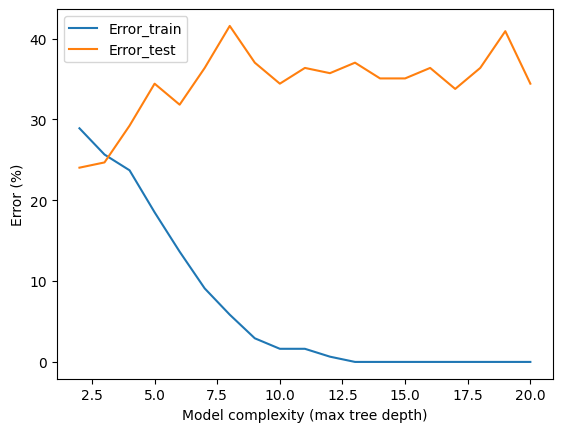

In [34]:

f = plt.figure()
plt.plot(tc, Error_train * 100)
plt.plot(tc, Error_test * 100)
plt.xlabel("Model complexity (max tree depth)")
plt.ylabel("Error (%)")
plt.legend(["Error_train", "Error_test"])

plt.show()


This looks like it is not working well. But it is one holdout. I have to benchmark this classifier with the baseline classifier

#### Baseline classifier:

It classifies everything like the main class

In [35]:
if (N/3 < sum(y_train)) :
    baseline_y_est_test = np.ones_like(y_est_test)
    baseline_y_est_train = np.ones_like(y_est_train)
else :
    baseline_y_est_test = np.zeros_like(y_est_test)
    baseline_y_est_train = np.zeros_like(y_est_train)

baseline_misclass_rate_test = sum(baseline_y_est_test != y_test) / float(len(baseline_y_est_test))
baseline_misclass_rate_train = sum(baseline_y_est_train != y_train) / float(len(baseline_y_est_train))
print(baseline_misclass_rate_train, baseline_misclass_rate_test)


0.37012987012987014 0.2987012987012987


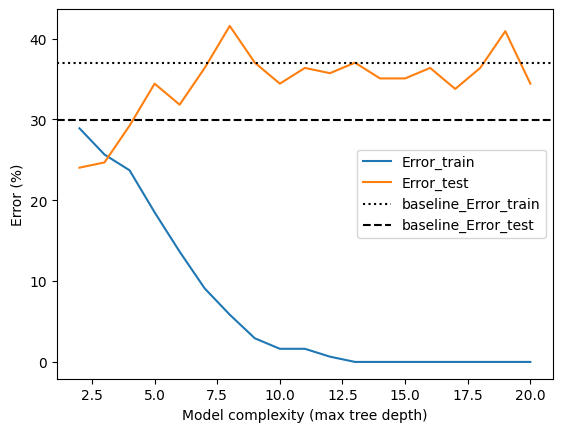

In [36]:
f = plt.figure()
plt.plot(tc, Error_train * 100)
plt.plot(tc, Error_test * 100)
plt.axhline(baseline_misclass_rate_train*100, color = 'black', linestyle =':')
plt.axhline(baseline_misclass_rate_test*100,color = 'black', linestyle ='--')
plt.xlabel("Model complexity (max tree depth)")
plt.ylabel("Error (%)")
plt.legend(["Error_train", "Error_test", "baseline_Error_train", "baseline_Error_test"])

plt.show()

So logically the training error is much higher, but this shows that the CT does not generalize well on the test data. By curiosity we want to plot the tree that we get. We select the best tree and plot the tree:

In [37]:
#Find the best fit
best_depth = tc[np.argmin(Error_test)]
#Then retrain the model on the whole data set
dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth = best_depth)
dtc = dtc.fit(X, y)
print(best_depth)

2


In [38]:
print(np.argmin(Error_test))


0


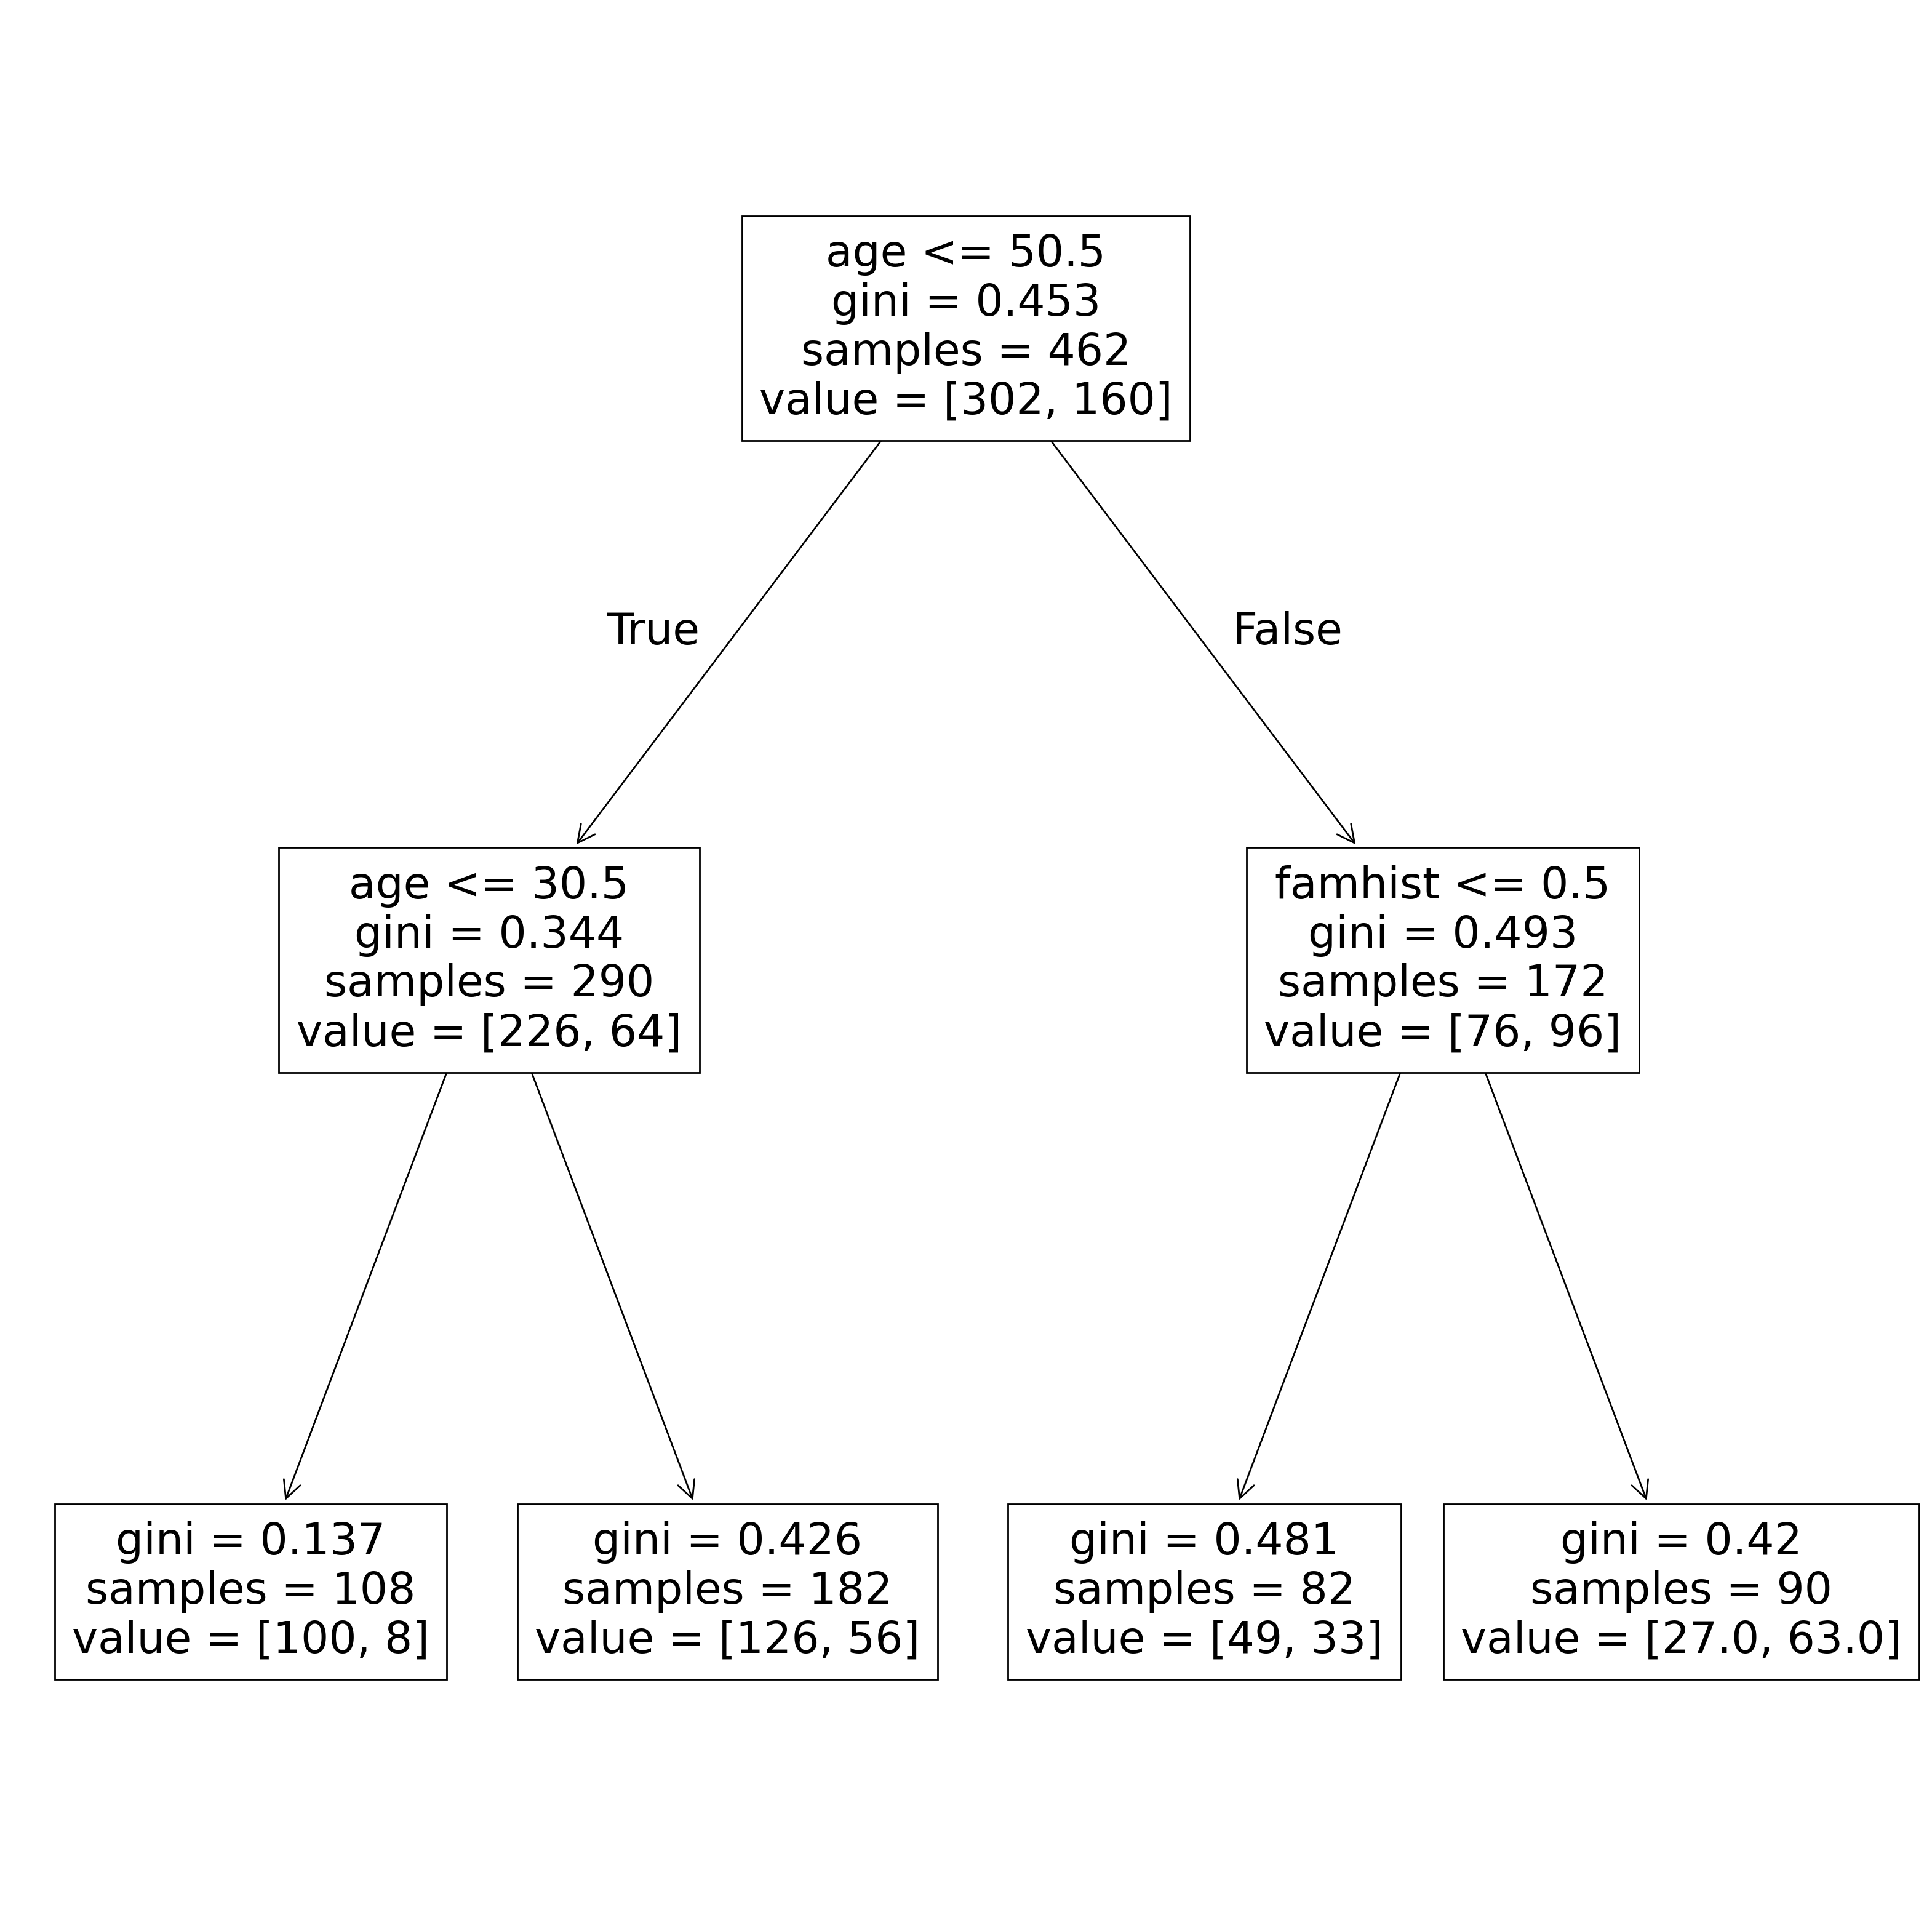

In [39]:
fig = plt.figure(figsize=(20, 20), dpi=200)
_ = tree.plot_tree(dtc, filled=False, feature_names=attributeNames)

This is more interpratable but seems like it is not working well. Now we will try KNN

In [40]:
from sklearn.neighbors import KNeighborsClassifier

In [44]:
#Chosing the distance

# Distance metric (corresponds to 2nd norm, euclidean distance).
# You can set dist=1 to obtain manhattan distance (cityblock distance).
# dist = 2
# metric = "minkowski"
# metric_params = {}  # no parameters needed for minkowski

# You can set the metric argument to 'cosine' to determine the cosine distance
# metric = 'cosine'
# metric_params = {} # no parameters needed for cosine

# To use a mahalonobis distance, we need to input the covariance matrix, too:
metric='mahalanobis'
metric_params={'V': np.cov(X_train, rowvar=False)}


Simple holdout-set cross validation

In [45]:
#The holdout is made at the begining and can't be redone in the same way because there is some stochasticity
# test_proportion = 1/3
# X_train, X_test, y_train, y_test = model_selection.train_test_split(
#     X, y, test_size=test_proportion
# )
K = np.arange(1, 50, 1)

KNN_Error_train = np.empty((len(K), 1))
KNN_Error_test = np.empty((len(K), 1))

    # Initialize variables

for i, k in enumerate(K):
    # Fit decision tree classifier, Gini split criterion, different pruning levels
    dtc = tree.DecisionTreeClassifier(criterion="gini", max_depth=t)
    dtc = dtc.fit(X_train, y_train)

    # Fit classifier
    knclassifier = KNeighborsClassifier(
    n_neighbors=k, metric=metric, metric_params=metric_params, p=dist
    )
    knclassifier.fit(X_train, y_train)

    # Evaluate classifier's misclassification rate over train/test data
    y_est_test = np.asarray(knclassifier.predict(X_test), dtype=int)
    y_est_train = np.asarray(knclassifier.predict(X_train), dtype=int)
    misclass_rate_test = sum(y_est_test != y_test) / float(len(y_est_test))
    misclass_rate_train = sum(y_est_train != y_train) / float(len(y_est_train))
    KNN_Error_test[i], KNN_Error_train[i] = misclass_rate_test, misclass_rate_train

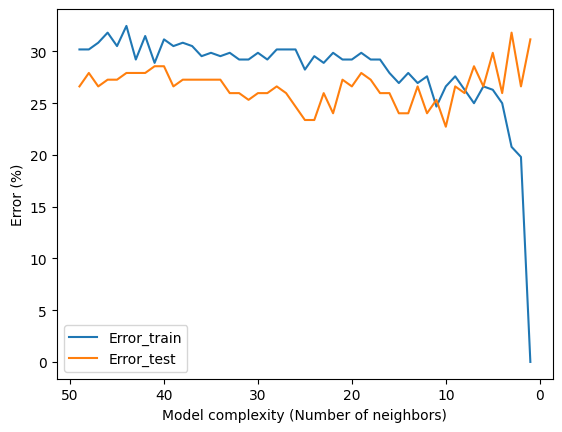

In [46]:

f = plt.figure()
plt.plot(K, KNN_Error_train * 100)
plt.plot(K, KNN_Error_test * 100)
plt.xlabel("Model complexity (Number of neighbors)")
plt.ylabel("Error (%)")
plt.legend(["Error_train", "Error_test"])
plt.gca().invert_xaxis()  # Reverses the x-axis

plt.show()

This isn't much better but it seems like the error is behaving less weirdly. The best try must be to fit a ANN. Maybe let's try other distances. One thing would be to reguralize the data or use the last distance.
It already looks much better. We can imagine cross validating the best distance and the best numbers of models with a two level cross validation.

### ANN